<a href="https://colab.research.google.com/github/Ekawaka/MACHINE-LEARNING-1E/blob/main/medical_insurance_premuim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introduction**

Importing necessary libraries

In [188]:
# Importing general libraries
import warnings
import itertools
import random
import joblib

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Class Imbalance
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Machine Learning Model Evaluation Methods
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [60]:
df= pd.read_csv('/content/medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### **EDA**

### Encoding

In [79]:
#get_dummies to strings, sex, smoker and region and concat with original data
df_dummied = pd.concat([df, pd.get_dummies(df[['sex', 'smoker', 'region']])], axis=1)

In [80]:
#drop the columns that i get_dummied
df_dummied.drop(columns=['sex', 'smoker', 'region'], inplace=True)

In [ ]:
#label encoding

In [85]:
df_dummied.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [89]:
# Convert boolean columns to integers (True/False to 1/0)
df = df.astype({
    'sex_female': int, 'sex_male': int,
    'smoker_no': int, 'smoker_yes': int,
    'region_northeast': int, 'region_northwest': int,
    'region_southeast': int, 'region_southwest': int
})

print(df)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400           1         0          0   
1      18  33.770         1   1725.55230           0         1          1   
2      28  33.000         3   4449.46200           0         1          1   
3      33  22.705         0  21984.47061           0         1          1   
4      32  28.880         0   3866.85520           0         1          1   
...   ...     ...       ...          ...         ...       ...        ...   
2767   47  45.320         1   8569.86180           1         0          1   
2768   21  34.600         0   2020.17700           1         0          1   
2769   19  26.030         1  16450.89470           0         1          0   
2770   23  18.715         0  21595.38229           0         1          1   
2771   54  31.600         0   9850.43200           0         1          1   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [90]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [91]:
# To understand my data
df.describe()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959,0.492785,0.507215,0.796537,0.203463,0.237374,0.239538,0.276335,0.246753
std,14.081459,6.129449,1.214806,12151.768945,0.500038,0.500038,0.402647,0.402647,0.425550,0.426879,0.447265,0.431200
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,26.220000,0.000000,4687.797000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.447500,1.000000,9333.014350,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.770000,2.000000,16577.779500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Insights into the exploration**

* The key variable of interest is 'charges', which is a continuous float value, showing the insurance premium associated with each individual.
* A broad age range between 18 to 22.5 years, predominantly male.
* Most individual have fewer than three children, with a BMI range(29.26 to 31.16) indicating overweight to moderate obesity.
*  There are four regions (northeast, northwest, southeast, and southwest), with a higher prevalence of smokers in the southeast.  
*  This analysis aims to explore how age, sex, BMI, children, smoking status, and region influence medical insurance premiums.
*   No missing values.









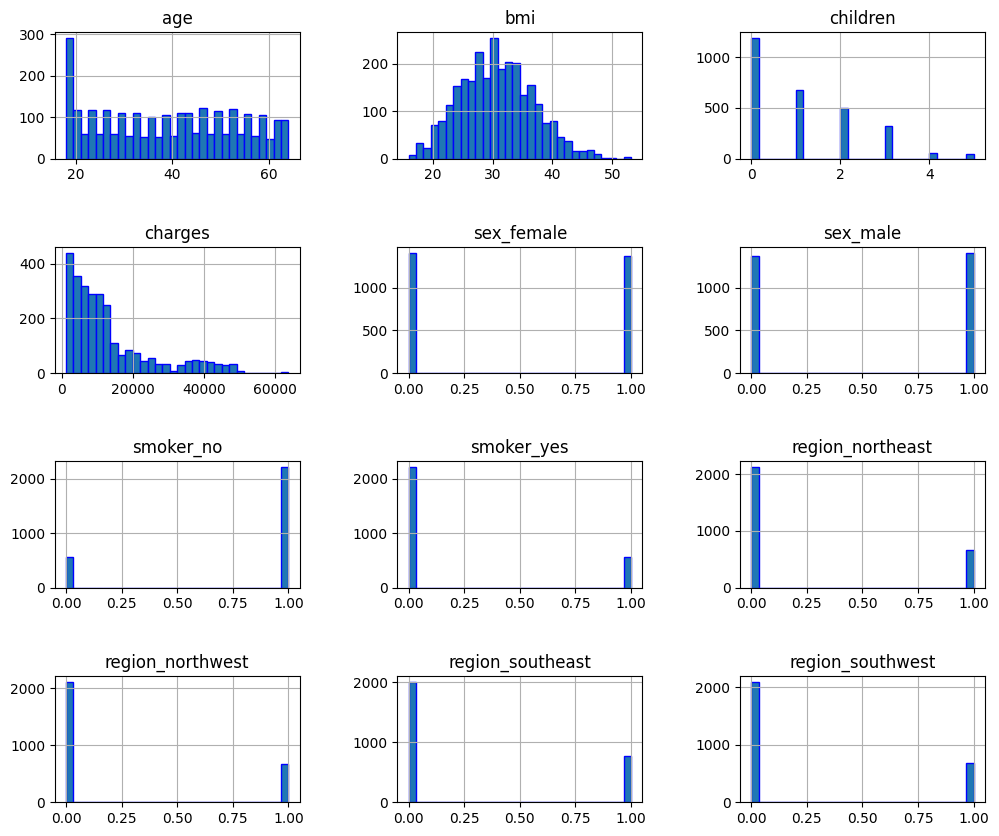

In [92]:
df.hist(figsize=(12, 10), bins=30, edgecolor="blue")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

3. **What are the primary factors influencing medical insurance premiums?**

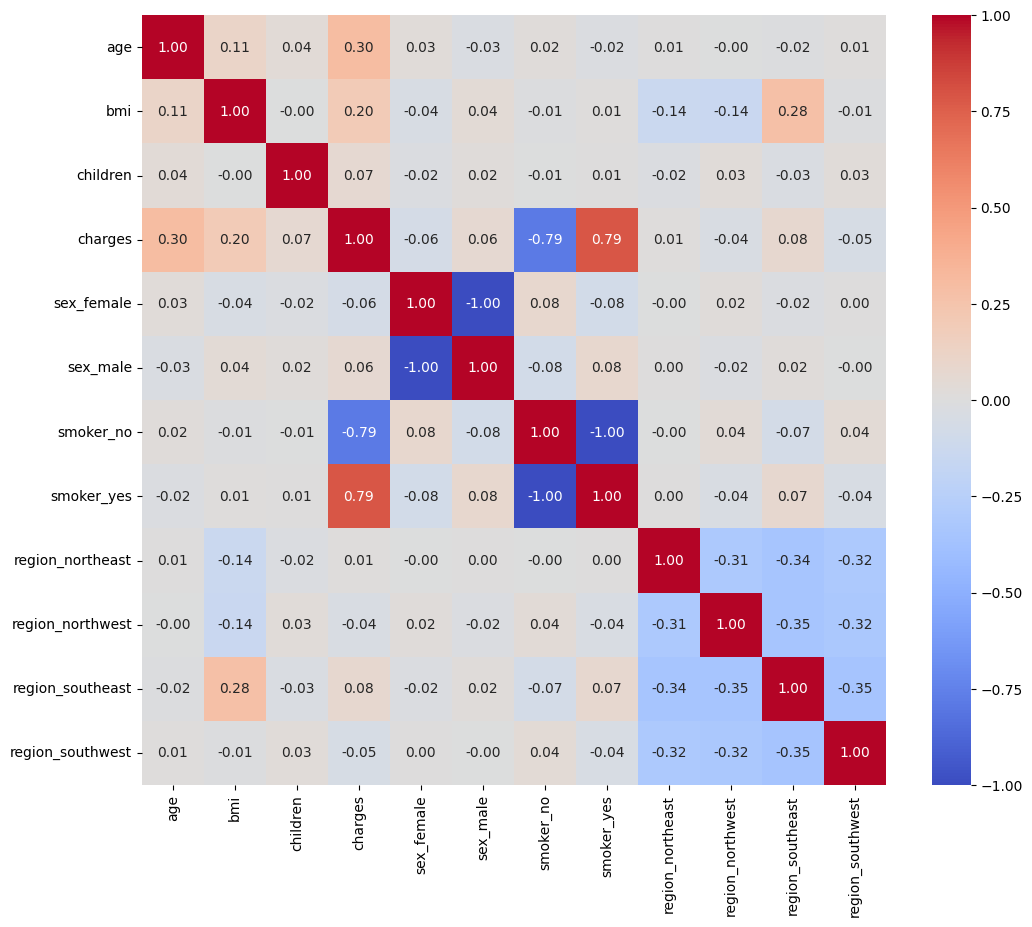

In [95]:
#Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Insights from the exploration.**

The primary factor to medical insurance premiums are smokers, with 79% correlation, followed by age with 30% correlation and bmi with 20%.

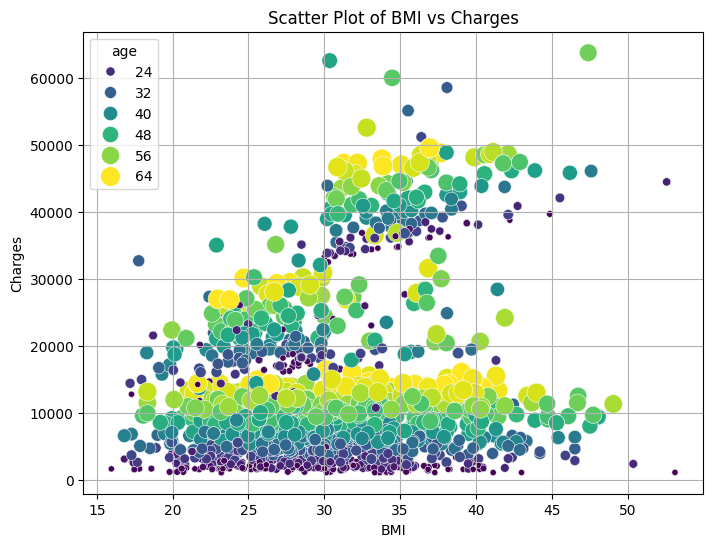

In [98]:
# Scatterplots analysis.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='age', palette='viridis', size='age', sizes=(20, 200), legend='brief')
plt.title('Scatter Plot of BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

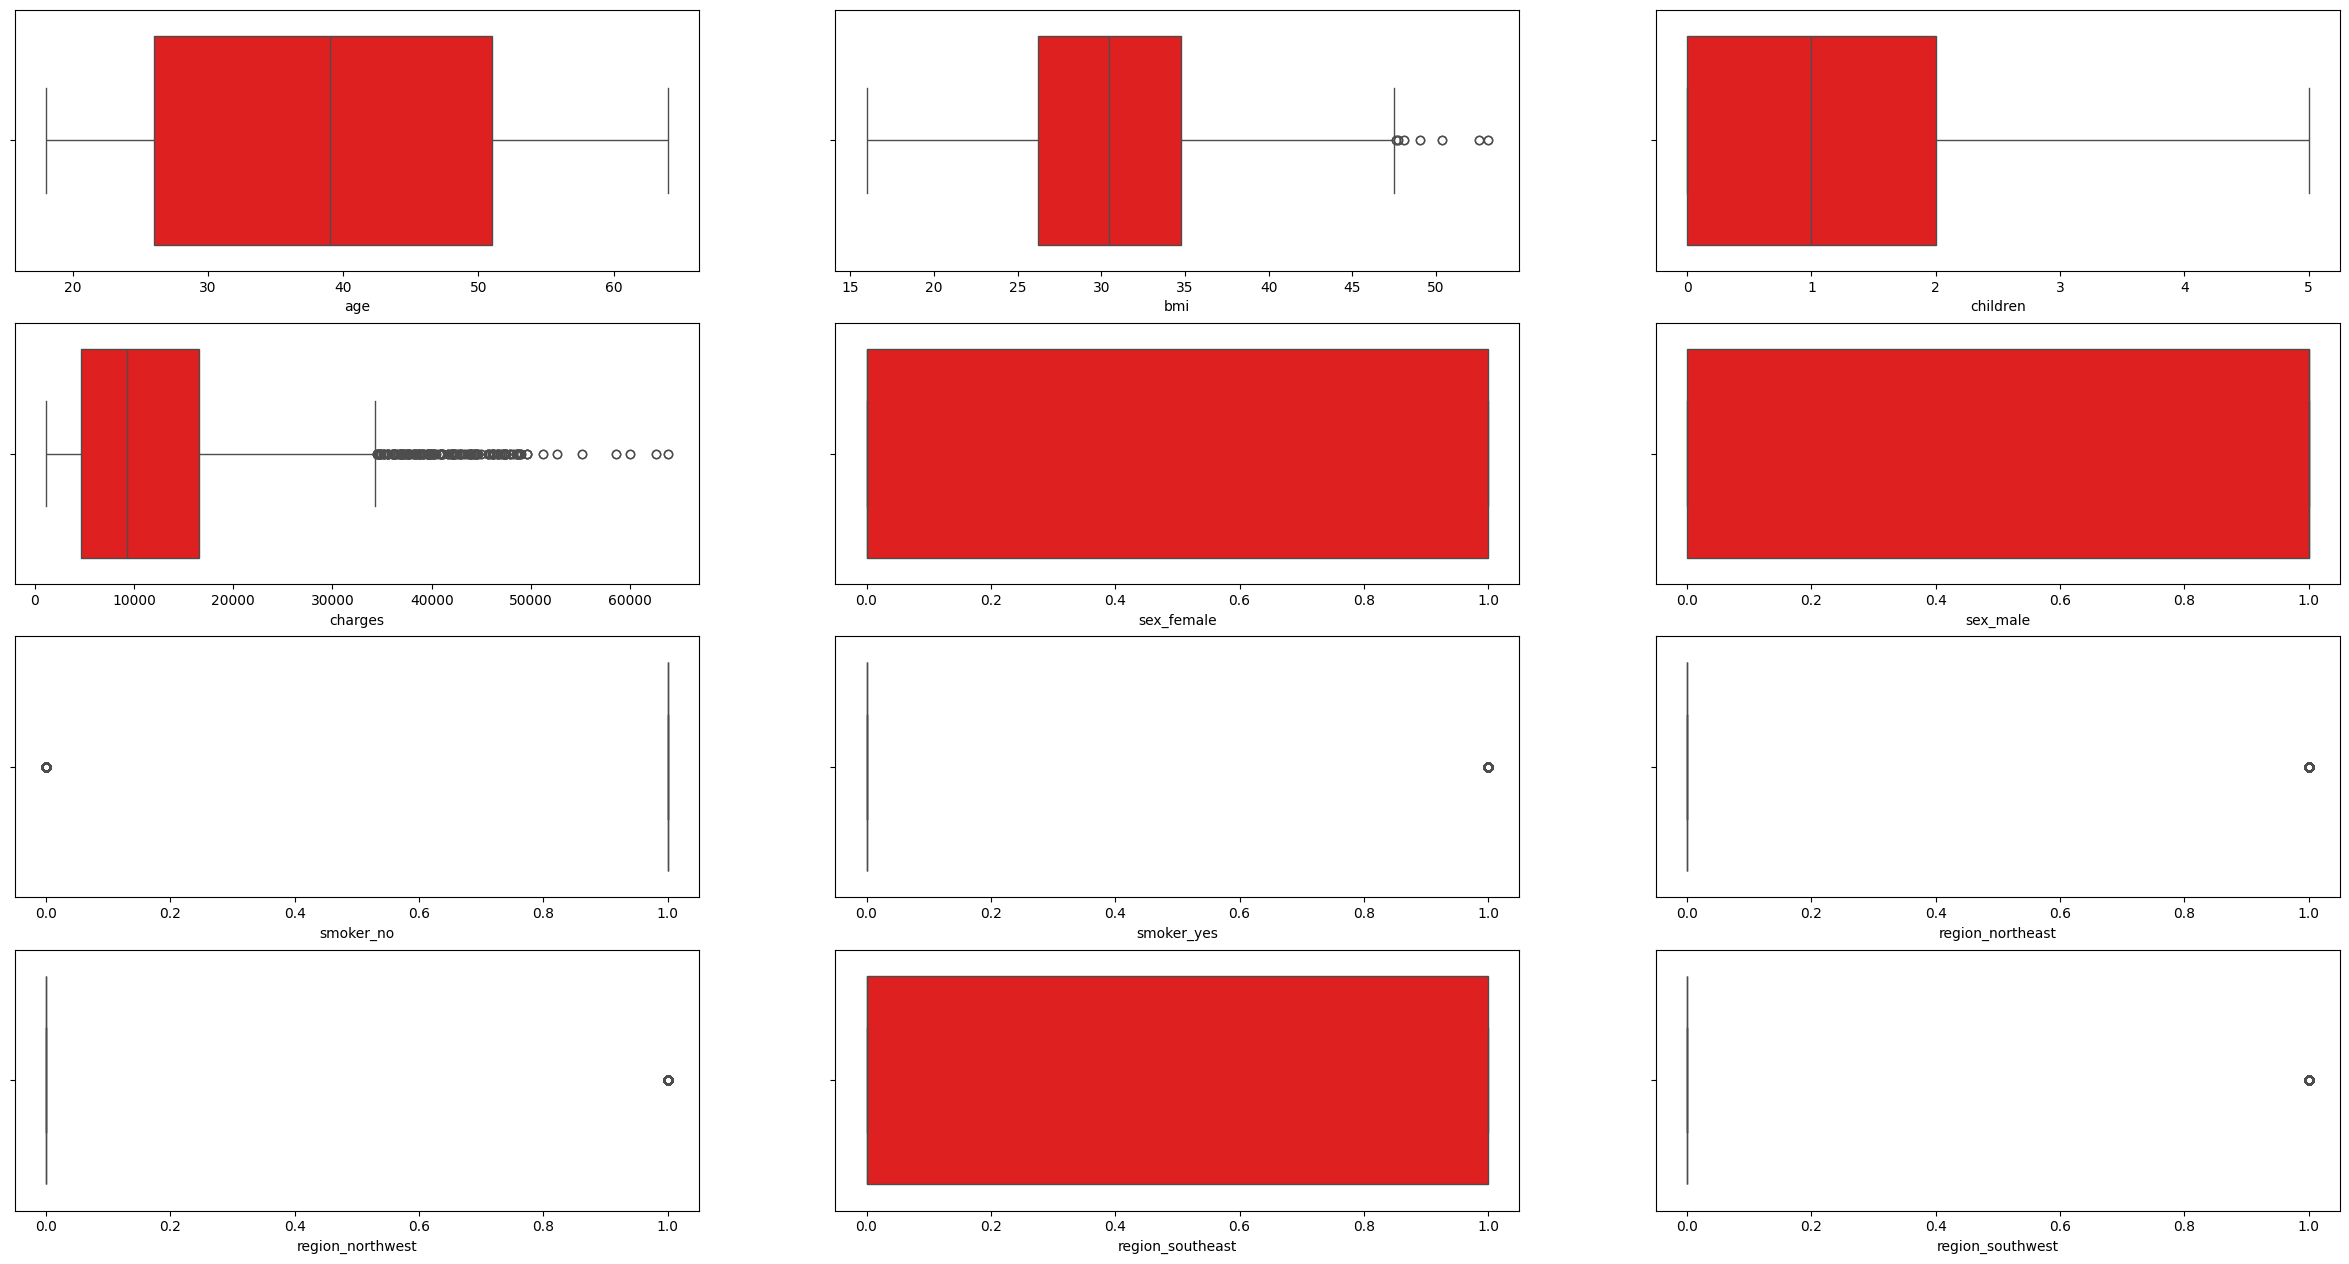

In [97]:
## Check for outliers
# Unitvariate analysis of all the numerical variables - we are trying to see if there are outliers.
fig = plt.figure(figsize=(30,40))
for i,j in zip(df.columns,range(len(df.columns))):
    if i!='label':
        ax = fig.add_subplot(10,3, j+1)
        sns.boxplot(data=df,x=df[i],orient='v',color="red")

**4. Training and Testing Models**

**To what extent do Machine Learning Models accurately predict medical insurance premium?**

In [99]:
X=df.drop(['charges'],axis=1)
y=df[['charges']]

In [113]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2217, 11) (555, 11) (2217, 1) (555, 1)


In [131]:
# Initialize models
models = [LinearRegression, GradientBoostingRegressor, RandomForestRegressor, SVR, Ridge, Lasso]

scores = {}

for model_class in tqdm(models):
    model = model_class()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    # Ensure prediction and y_test shapes match
    prediction = prediction.reshape(y_test.shape)

    r2 = r2_score(y_test, prediction)

    scores[model_class.__name__] = r2

print(scores)

  0%|          | 0/6 [00:00<?, ?it/s]

{'LinearRegression': 0.7705502682306344, 'GradientBoostingRegressor': 0.8848686691438176, 'RandomForestRegressor': 0.944299418274146, 'SVR': -0.07516138897352365, 'Ridge': 0.7701762468155822, 'Lasso': 0.7702610028139951}


 Random Forest Regressor performed the best of all the models.

**Hyperparameter Tuning**

Six of the most popular regression algorithms were tested, and the Random Forest Regressor performed the best.

Therefore, we apply hyperparameter tuning to the Random Forest Regressor.

Hyperparameter tuning is done using GridSearchCV from scikit-learn to improve the acuracy.

The model is saved using the joblib library as 'trained_model-0.1.0.pkl'.

In [132]:
# Hyperparameter grid for Random Forest
param_grid_rfr = {
    'n_estimators': [20, 40, 80, 100, 150],
    'max_features': [1.0, 'log2'],  # Changed 'auto' to 1.0
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [170]:
def train_rfr_model(params, x_train, x_test, y_train, y_test):
    # Initialize the model
    rfr = RandomForestRegressor(random_state=42)

    # Initialize GridSearchCV
    rfr_grid = GridSearchCV(estimator=rfr, param_grid=params,
                            cv=5, verbose=0, n_jobs=-1)

    # Fit the model
    rfr_grid.fit(x_train, y_train.ravel())

    # Best parameters and best score
    print("Best parameters:", rfr_grid.best_params_)

    # Evaluate on test set
    best_rfr = rfr_grid.best_estimator_
    y_pred = best_rfr.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    print("Test R2:", test_score)

Evaluation

A feature importance plot is presented to show which features play a crucial role in predicting the target.

The predicted values of the test set are plotted against the actual values in a scatter plot to evaluate the model's performance.

In [179]:
def feature_importance_plot(model, df):
    # Calculate feature importances
    importances = model.feature_importances_
    features = df.drop(columns=['charges']).columns
    features = [(x.replace('_', ' ')).capitalize() for x in features]

    feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
    feature_importances = feature_importances.sort_values(by='Importance', ascending=True)

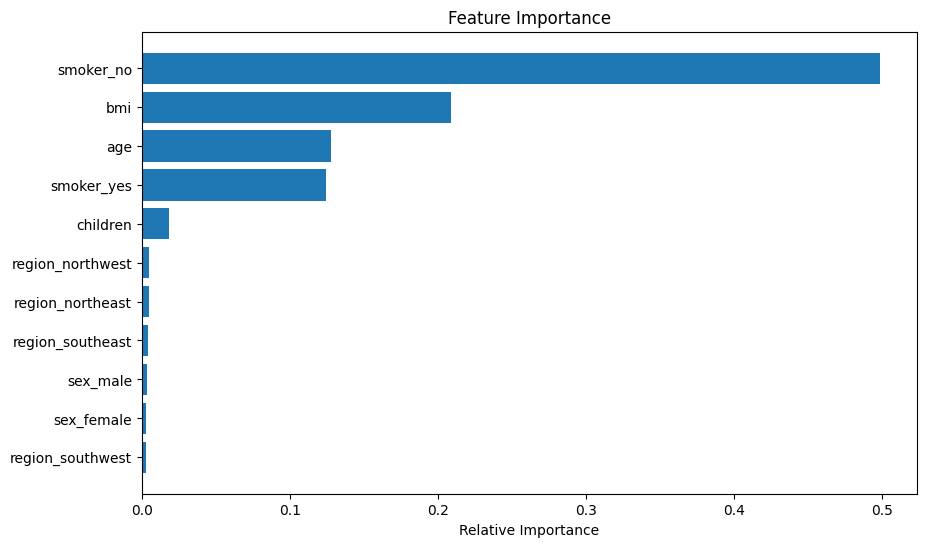

In [186]:
# Features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

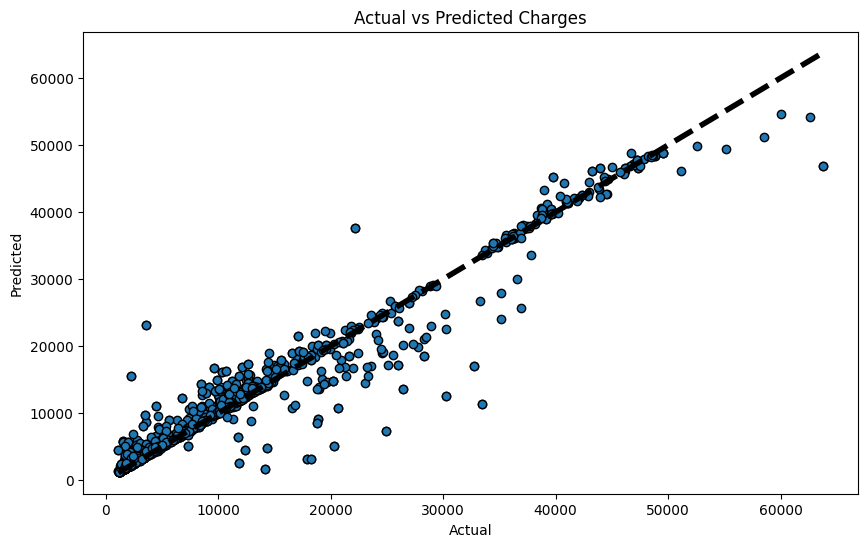

Mean Squared Error: 11285155.781371139
R^2 Score: 0.9261400221154915


In [189]:
# Separate features and target variable
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Charges')
plt.show()

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')